In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import librosa
import librosa.display
%matplotlib inline

In [5]:
# Utilizzare per il salvataggio in pgf da in inserire in latex
# quando attivo non permette la visualizzazione del plot su jupyter
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

# Capitolo 2 Frequenza

### 2.1 Frequenza e unità di misura

Abbiamo:
- frequenza = f
- ∆t = periodo -> tempo (secondi,ore etc..)

In [44]:
def calculate_frequency(period):
    frequency = 1 / period
    return str(frequency) +  " Hz"

def calculate_period(frequency):
    period = 1 / frequency
    return str(period) + " Seconds"

In [45]:
frequency = 440
calculate_period(frequency)

'0.0022727272727272726 Seconds'

In [46]:
period = 0.0022727272727272726
calculate_frequency(period)


'440.0 Hz'

### 2.2 Seni e Coseni

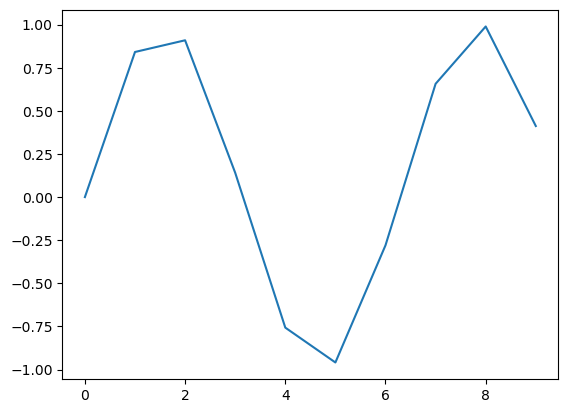

In [20]:
import math
y = librosa.tone(2, duration= 1)


def sine(length):
    ##però voglio tenere conto della frequenza di campionamento
    wave = []
    for i in range(length):
        y = math.sin(i)
        wave.append(y)
    return wave
    
#def cosine():

plt.plot(sine(10))

### 2.5 Segnali periodici, puri e composti

In [52]:
y = librosa.tone(2, duration= 1)
sr = 22050
# a frequenza di campionamento n quanti campioni mi servono per plottare ...
# ciclo for per costruire square wave

def sawtooth(nr_tones):
    y = 0;
    for i in range(nr_tones):
        #però solo numeri dispari
        y = y + librosa.tone(2 * (i+1), duration= 1) / (i+1)
    return y

def square(nr_tones):
    y = 0;

    for i in range(nr_tones):
        #però solo numeri dispari noo 
        if i%2 != 0:
            y = y + librosa.tone(2 * (i), duration= 1) / (i)
    return y

def triangle(nr_tones):
    y = 0;

    for i in range(nr_tones):
        #come switcho la fase
        phase = 0;
        if i%2 != 0:
            if phase == 0:
                phase = np.pi;
            elif phase == np.pi:
                phase = 0;
            y = y + librosa.tone(2 * (i), duration= 1, phi = phase) / (i**2) 
            print(i**2)
    return y


# def triangle(nr_tones):
#     y = 0

#     for i in range(nr_tones):
#          if i%2 == 0:
#             y = y + librosa.tone(2 * (i), duration= 1) / (i**2)
#     return y

plt.clf()
# plt.plot(sawtooth(1000))
#plt.plot(square(1000))
#plt.show()

# from scipy import signal

# t = np.linspace(0, 1, 500)
# triangle = signal.sawtooth(2 * np.pi * 5 * t, 0.5)
# plt.plot(t, triangle)

plt.plot(triangle(10))
plt.savefig("../git_dispense/cs1-dispense/figures/triangolare.pgf")

1
9
25
49
81


### 2.6 Categorie di spettri

In [6]:
# plotting del rumore  bianco e rosa
plt.clf()

def plot_spectrum(s):
    f = np.fft.rfftfreq(len(s))
    return plt.loglog(f, np.abs(np.fft.rfft(s)))[0]

def noise_psd(N, psd = lambda f: 1):
        X_white = np.fft.rfft(np.random.randn(N));
        S = psd(np.fft.rfftfreq(N))
        # Normalize S
        S = S / np.sqrt(np.mean(S**2))
        X_shaped = X_white * S;
        return np.fft.irfft(X_shaped);

def PSDGenerator(f):
    return lambda N: noise_psd(N, f)

@PSDGenerator
def white_noise(f):
    return 1;

@PSDGenerator
def blue_noise(f):
    return np.sqrt(f);

@PSDGenerator
def violet_noise(f):
    return f;

@PSDGenerator
def brownian_noise(f):
    return 1/np.where(f == 0, float('inf'), f)

@PSDGenerator
def pink_noise(f):
    return 1/np.where(f == 0, float('inf'), np.sqrt(f))


#plt.style.use('dark_background')
plt.figure(figsize=(7, 4), tight_layout=True)
for G, c in zip(
        [brownian_noise, pink_noise, white_noise, blue_noise, violet_noise], 
        ['brown', 'hotpink', 'yellow', 'blue', 'violet']):
    plot_spectrum(G(30*50_000)).set(color=c, linewidth=3)
plt.legend(['brownian', 'pink', 'white', 'blue', 'violet'])
plt.suptitle("Colored Noise");
plt.ylim([1e-3, None]);

plt.savefig("../git_dispense/cs1-dispense/figures/rumori_vari.pgf")

- spettri armonici, inarmonici (mancano le formule delle sommatorie)

# Correzioni:

Riga 39 viene dato per scontato il concetto di trasformata di fourier e scomposizione del suono in sinusoidi.